In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("F:\\0. The Data Psychology\\4. New_Machine Learning\\laptop price prediction\\Laptop_CSV_File.csv")

In [3]:
df = data.copy()

In [4]:
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [5]:
df.head()

,Unnamed: 0.1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.shape

(1303, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
df.isnull().sum()

Unnamed: 0.1        0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0.1', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
df["Ram"]= df["Ram"].str.replace("GB","")

In [11]:
df["Ram"] = df["Ram"].astype("int64")

In [12]:
df["Ram"]

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 122.3+ KB


In [14]:
df.head(3)

,Unnamed: 0.1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [15]:
df["Weight"] =df["Weight"].str.replace("kg","")

In [16]:
df["Weight"] =df["Weight"].astype("float64")

In [17]:
df["Weight"]

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [18]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

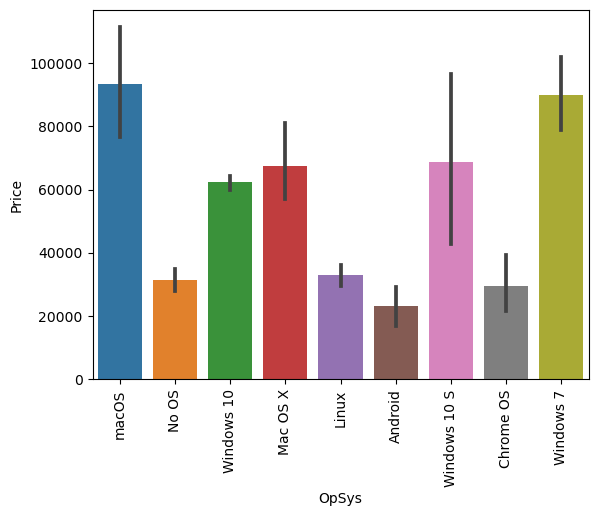

In [19]:
sn.barplot(x= df['OpSys'],y= df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [20]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [21]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def setcategory(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'

    elif text=='Linux':
        return 'Linux'
    
    else:
        return 'Other'

In [22]:
df['OpSys']= df['OpSys'].apply(lambda x: setcategory(x))

In [23]:
df.head(3)

,Unnamed: 0.1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Other,1.86,30636.0000


In [24]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu',
        'OpSys'],
       dtype='object'),
 Index(['Unnamed: 0.1', 'Inches', 'Ram', 'Weight', 'Price'], dtype='object'))

In [25]:
df["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [26]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [27]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')

In [28]:
df.columns

Index(['Unnamed: 0.1', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [29]:
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Unnamed: 0.1 is : [   0    1    2 ... 1300 1301 1302]
---------------------------------------------------------------------------
Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2

In [30]:
for col in df.columns:
    valuecounts(col)
    print("-"*75)

Valuecounts of the particular col Unnamed: 0.1 is : Unnamed: 0.1
0       1
856     1
874     1
873     1
872     1
       ..
433     1
432     1
431     1
430     1
1302    1
Name: count, Length: 1303, dtype: int64
---------------------------------------------------------------------------
Valuecounts of the particular col Company is : Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
---------------------------------------------------------------------------
Valuecounts of the particular col TypeName is : TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dty

### Exploratory Data Analysis¶

<Axes: xlabel='Price', ylabel='Density'>

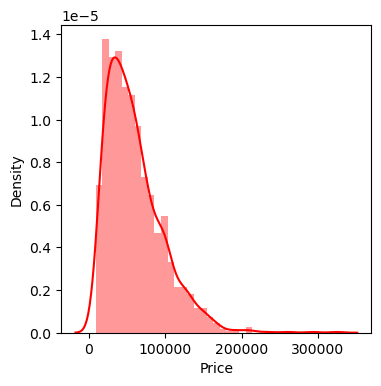

In [31]:
# viewing the distribution of the price column
plt.figure(figsize=(4,4))
sn.distplot(df['Price'],color='red')

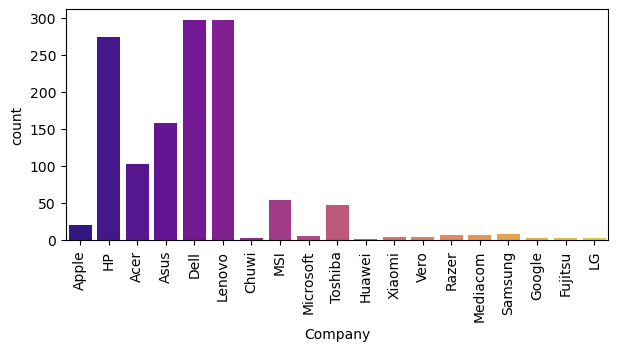

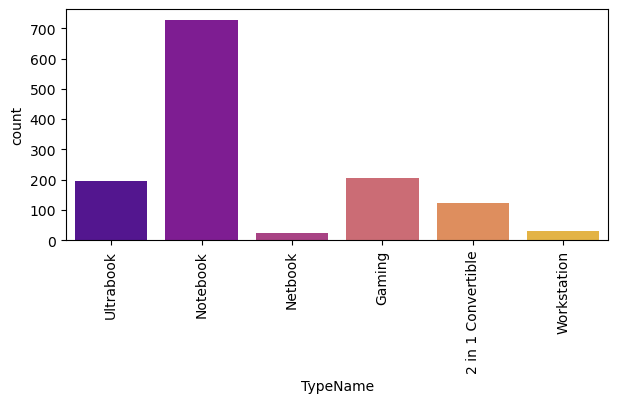

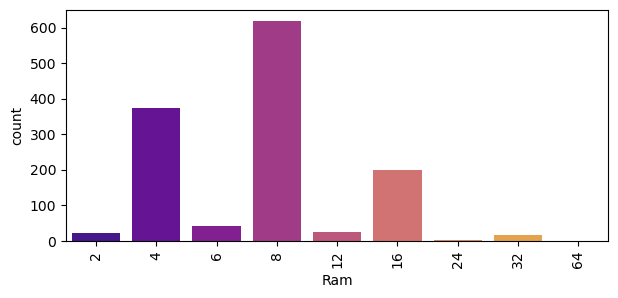

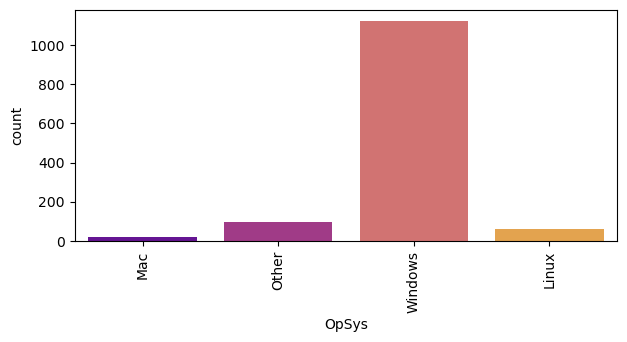

In [32]:
## plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(7,3))
    sn.countplot(data= df, x = col, palette='plasma')
    plt.xticks(rotation='vertical')
    
toview = ['Company', 'TypeName','Ram','OpSys']
for col in toview:
    drawplot(col)

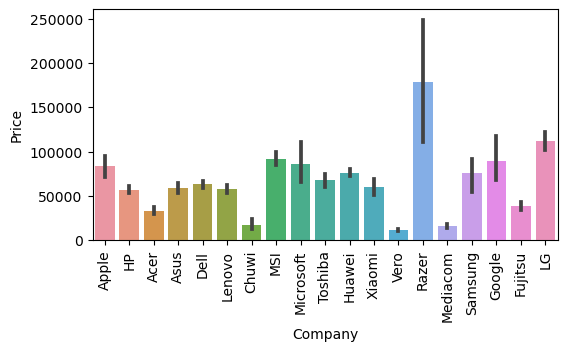

In [33]:
# average price for each of the laptop brands
# this will say us the insight that as per company the price of the laptop vary


plt.figure(figsize=(6,3))
sn.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

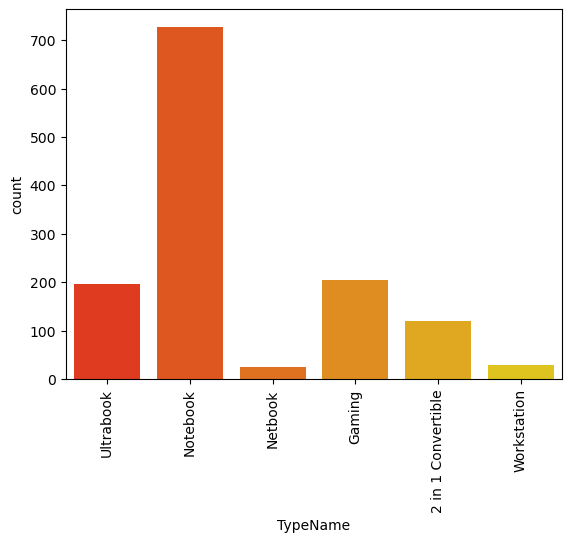

In [34]:
## various types of laptops

sn.countplot(data = df, x = 'TypeName',palette='autumn') 
plt.xticks(rotation = 'vertical')

<Axes: xlabel='Inches', ylabel='Price'>

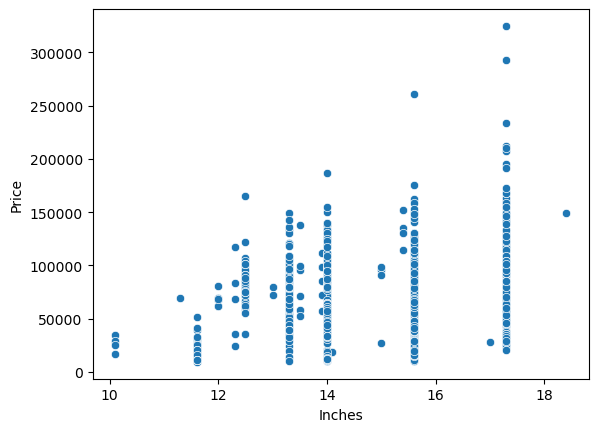

In [35]:
# variation of inches towards the price

sn.scatterplot(x = df['Inches'],y = df['Price'])

In [36]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [37]:
# creating a new col,touchscreen if the value is 1 that laptop is touch screen

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)

df.head(3)

,Unnamed: 0.1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232,0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0


<Axes: xlabel='TouchScreen', ylabel='count'>

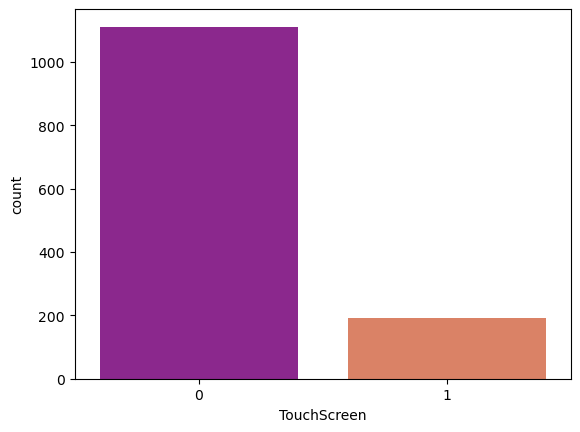

In [38]:
sn.countplot(data = df, x = 'TouchScreen' ,palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

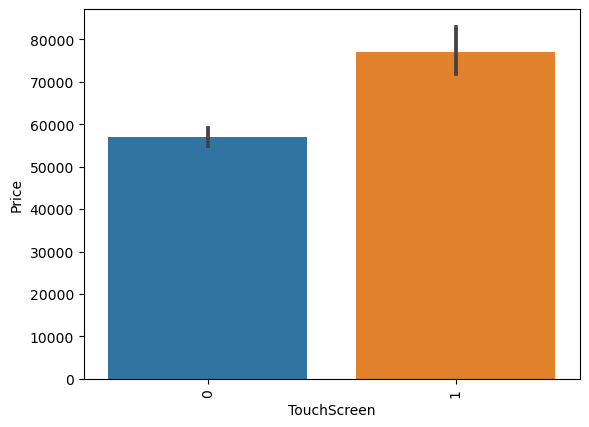

In [39]:
# touch screen on comparision with price of laptop

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')

In [40]:
# creating a new col named IPS,does the laptop have IPS facility or not

df['IPS'] = df['ScreenResolution'].apply(lambda element:1 if "IPS" in element else 0)
df.sample(5)

,Unnamed: 0.1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
848,848,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows,1.28,121318.56,1,0
388,388,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8,256GB SSD,Nvidia Quadro M1200,Windows,2.00,113752.80,0,1
875,875,Dell,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows,1.60,90043.20,0,0
298,298,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6,1TB HDD,AMD Radeon R5 430,Windows,2.40,26586.72,0,0
1285,1285,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows,1.30,79866.72,1,1


<Axes: xlabel='IPS', ylabel='count'>

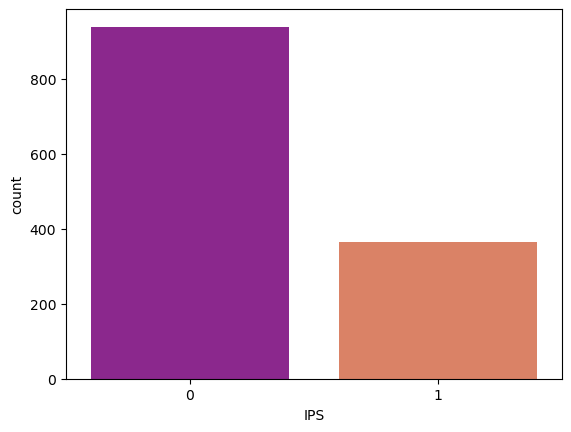

In [41]:
sn.countplot(data= df, x = "IPS",palette='plasma')

### Extracting the X Resolution and the Y Resolution

In [42]:
# we will split the text at the "x" letter and seperate the 2 parts
# from this we can observe that one of the col is Y res we need to do
# some feature engineering on the X res col

splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [43]:

df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Unnamed: 0.1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0,0,Full HD 1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [44]:
'''
So basically from that whole text of the X_res col,we need to 
extract the digits from it,but the problem is the numbers are scattered 
in some cases,that is the reason why i am using regex,if we use this
we will exactly get the numbers which we are looking for!,
so firstly replace all the "," with "" and then find all numbers
from that string as "\d+\.?\d+",\d means that integer number and \.? 
all the numbers which come after an number and \d+ the string must end with number


'''


df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

,Unnamed: 0.1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,1,2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0,0,1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,1,2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,1,2560,1600


In [45]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
 12  TouchScreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  X_res             1303 non-null   int32  
 15  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(2), int64(4), object(

<Axes: >

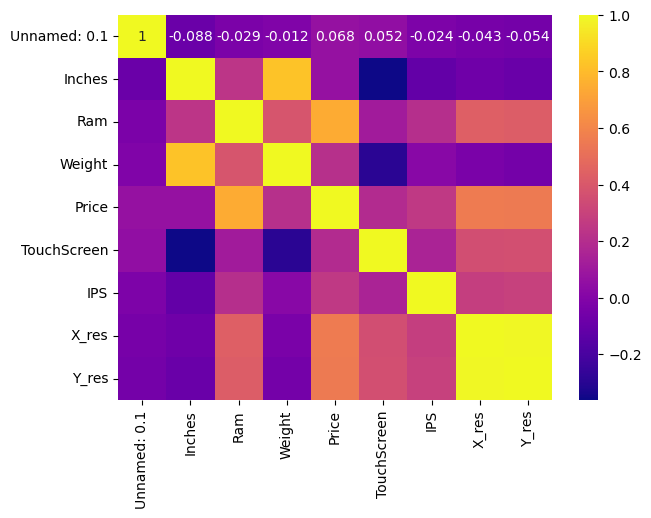

In [46]:
# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap for the numeric columns
plt.figure(figsize=(7,5))
sn.heatmap(numeric_df.corr(), annot=True, cmap='plasma')

In [47]:
numeric_df.corr()['Price']

Unnamed: 0.1    0.067984
Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
IPS             0.252208
X_res           0.556529
Y_res           0.552809
Name: Price, dtype: float64

##### **From the correlation plot we observed that as the X_res and Y_res is increasing,the price of the laptop is also increasing,so `X_res and Y_res` are positively correlated and they are giving much information,so that is the reason why i had splitted `Resolution` column into `X_res and Y_res` columns respectively**

##### **So to make things good,we can create a new column named `PPI{pixels per inch}`,now  as we saw from the correlation plot that the `X_res and Y_res` are having much collinearity,so why not combine them with `Inches` which is having less collinearity,so we will combine them as follows ↓,so here is the formula of how to calculate `PPI` {pixels per inch}**

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [48]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Unnamed: 0.1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,1,2560,1600,226.983005
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,0,1440,900,127.677940
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0,0,1920,1080,141.211998
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,1,2880,1800,220.534624
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,1,2560,1600,226.983005


In [49]:
# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()['Price']

Unnamed: 0.1    0.067984
Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
TouchScreen     0.191226
IPS             0.252208
X_res           0.556529
Y_res           0.552809
PPI             0.473487
Name: Price, dtype: float64

In [50]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Unnamed: 0.1,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,1,226.983005
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,0,127.677940
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0,0,141.211998
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,1,220.534624
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,1,226.983005


##### **Now we will work on `CPU` column,as that also has much text data and we need to process it efficiently as we may get good insights from them**

In [51]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [52]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()

,Unnamed: 0.1,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [53]:
df['CPU_name'].value_counts()

CPU_name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1

In [54]:
# Replace values in 'CPU_name' column based on conditions
def update_cpu_name(cpu):
    if 'Intel' in cpu:
        if 'Core i7' in cpu:
            return 'Intel Core i7'
        elif 'Core i5' in cpu:
            return 'Intel Core i5'
        elif 'Core i3' in cpu:
            return 'Intel Core i3'
        else:
            return 'Intel Processor'  # For other Intel processors
    elif 'AMD' in cpu:
        return 'AMD Processor'  # For all AMD processors
    else:
        return cpu  # For any other processors that don't match

# Apply the function to the 'CPU_name' column
df['CPU_name1'] = df['CPU_name'].apply(update_cpu_name)

# Display the updated DataFrame
print(df['CPU_name1'].value_counts())

CPU_name1
Intel Core i7             527
Intel Core i5             423
Intel Processor           154
Intel Core i3             136
AMD Processor              62
Samsung Cortex A72&A53      1
Name: count, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Intel Processor'),
  Text(5, 0, 'Samsung Cortex A72&A53')])

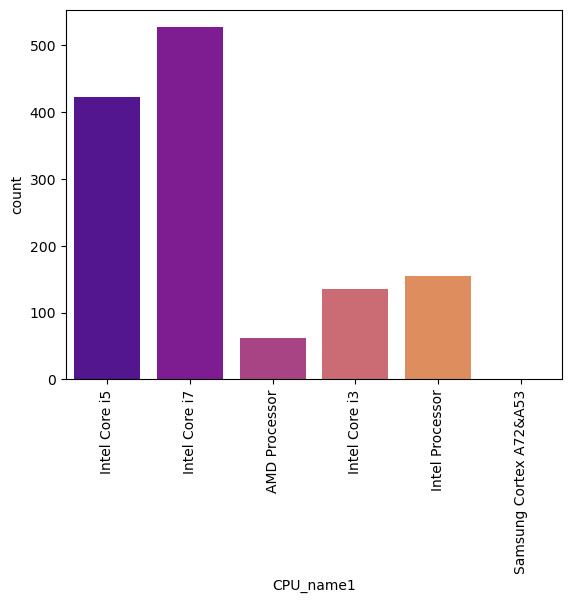

In [55]:
sn.countplot(data = df, x ='CPU_name1', palette='plasma')
plt.xticks(rotation = 'vertical')

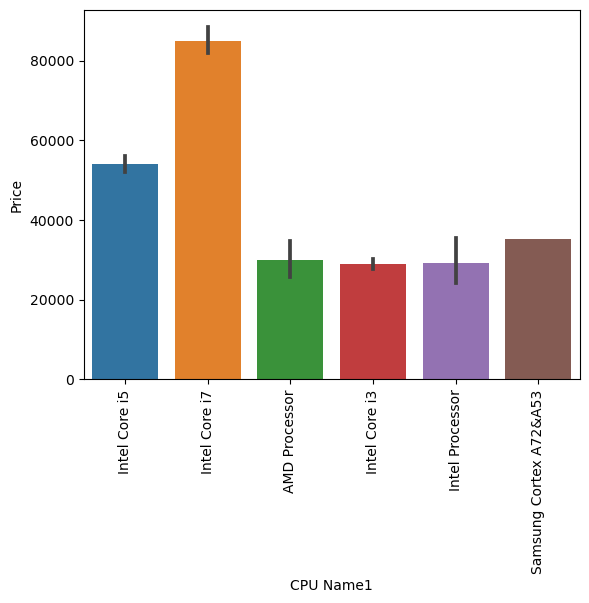

In [56]:
# Plotting price vs CPU_name variation
sn.barplot(x='CPU_name1', y='Price', data=df)

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Optionally, add labels for clarity
plt.xlabel('CPU Name1')
plt.ylabel('Price')

# Show the plot
plt.show()

In [57]:
## dropping the cpu column

df.drop(columns=['Cpu'],inplace=True)
df.head()

,Unnamed: 0.1,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,CPU_name1
0,0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [58]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [59]:
df['Memory'].iloc[:1][0]

'128GB SSD'

In [60]:
## 4 most common variants observed : HHD,SSD,Flash,Hybrid

# this expression will remove the decimal space for example 1.0 TB will be 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)

# replace the GB word with " "

df['Memory'] = df['Memory'].str.replace('GB','')

# replace the TB word with "000"

df['Memory'] = df['Memory'].str.replace('TB','000')

# split the word accross the "+" character

newdf = df['Memory'].str.split("+",n = 1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [61]:
# we will strip up all the white spaces,basically eliminating white space

df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Unnamed: 0.1,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,CPU_name1,first
0,0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,128 SSD
1,1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,128 Flash Storage
2,2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,256 SSD
3,3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,512 SSD
4,4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,256 SSD


In [62]:
def applychanges(value):
    
    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply = ['HDD','SSD','Hybrid','FlashStorage']    
for value in listtoapply:
    applychanges(value)
    
    
df.head()

,Unnamed: 0.1,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,CPU_name1,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,128 SSD,0,1,0,0
1,1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,128 Flash Storage,0,0,0,0
2,2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,256 SSD,0,1,0,0
3,3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,512 SSD,0,1,0,0
4,4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,256 SSD,0,1,0,0


In [63]:
# Remove all non-digit characters and keep only the numbers
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Convert to numeric values if needed (optional)
df['first'] = pd.to_numeric(df['first'], errors='coerce')

# Check the value counts after the transformation
print(df['first'].value_counts())

first
256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64


In [64]:
df['Second'] = newdf[1]
df.head()

,Unnamed: 0.1,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,CPU_name1,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,128,0,1,0,0,None
1,1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,128,0,0,0,0,None
2,2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,256,0,1,0,0,None
3,3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,512,0,1,0,0,None
4,4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,256,0,1,0,0,None


In [65]:
df['Second'].value_counts()

Second
  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  500 HDD          2
  1000 Hybrid      2
  512 SSD          1
Name: count, dtype: int64

In [66]:
def applychanges1(value):
    
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)

In [67]:
# Remove all non-digit characters from the 'Second' column
df['Second'] = df['Second'].str.replace(r'\D', '', regex=True)

# Check the value counts after the transformation
print(df['Second'].value_counts())

Second
0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: count, dtype: int64


In [68]:
df

,Unnamed: 0.1,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,...,128,0,1,0,0,0,0,0,0,0
1,1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,...,128,0,0,0,0,0,0,0,0,0
2,2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0,...,256,0,1,0,0,0,0,0,0,0
3,3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,...,512,0,1,0,0,0,0,0,0,0
4,4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,...,256,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows,1.80,33992.6400,1,...,128,0,1,0,0,0,0,0,0,0
1299,1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows,1.30,79866.7200,1,...,512,0,1,0,0,0,0,0,0,0
1300,1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows,1.50,12201.1200,0,...,64,0,0,0,0,0,0,0,0,0
1301,1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows,2.19,40705.9200,0,...,1000,1,0,0,0,0,0,0,0,0


In [69]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

,Unnamed: 0.1,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,...,128,0,1,0,0,0,0,0,0,0
1,1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,...,128,0,0,0,0,0,0,0,0,0
2,2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,Other,1.86,30636.0000,0,...,256,0,1,0,0,0,0,0,0,0
3,3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,...,512,0,1,0,0,0,0,0,0,0
4,4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,...,256,0,1,0,0,0,0,0,0,0


In [70]:
# multiplying the elements and storing the result in subsequent columns


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])

df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])

df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])

df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])

In [71]:
## dropping of uncessary columns

df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [72]:
df.sample(5)

,Unnamed: 0.1,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,CPU_name1,HDD,SSD,Hybrid,Flash_Storage
743,743,Lenovo,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows,1.70,53226.7200,1,0,157.350512,Intel Core i5,Intel Core i5,0,256,0,0
570,570,HP,Workstation,8,500 HDD,Nvidia Quadro M1200,Windows,3.14,99153.5472,0,0,106.113062,Intel Core i5,Intel Core i5,500,0,0,0
166,166,Acer,Notebook,4,1000 HDD,Intel HD Graphics 505,Windows,2.10,19367.8128,0,0,100.454670,Intel Pentium Quad,Intel Processor,1000,0,0,0
550,550,Lenovo,Notebook,4,128 SSD,Intel HD Graphics 520,Windows,2.20,26586.7200,0,0,141.211998,Intel Core i3,Intel Core i3,0,128,0,0
470,470,HP,2 in 1 Convertible,8,512 SSD,Intel UHD Graphics 620,Windows,1.29,106506.7200,1,1,331.264236,Intel Core i7,Intel Core i7,0,512,0,0


In [73]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Unnamed: 0.1,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,CPU_name1,HDD,SSD,Hybrid,Flash_Storage
691,691,Lenovo,Notebook,4,Intel HD Graphics 620,Windows,1.70,37242.7200,0,0,157.350512,Intel Core i5,Intel Core i5,0,256,0,0
1022,1022,HP,Notebook,8,Intel HD Graphics 620,Windows,1.11,61218.7200,0,1,165.632118,Intel Core i5,Intel Core i5,0,256,0,0
362,362,Lenovo,Notebook,6,Nvidia GeForce GTX 940MX,Windows,2.80,38308.3200,0,0,106.113062,Intel Core i5,Intel Core i5,1000,128,0,0
216,216,Lenovo,Notebook,8,Nvidia GeForce GTX 940MX,Other,2.80,31381.9200,0,0,106.113062,Intel Core i5,Intel Core i5,1000,0,0,0
1244,1244,HP,Notebook,4,Intel HD Graphics 520,Windows,1.54,58607.4672,0,0,157.350512,Intel Core i5,Intel Core i5,0,256,0,0


In [74]:
# Select only the numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

In [77]:
numeric_df.corr()["Price"]

Unnamed: 0.1     0.067984
Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64

In [78]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Unnamed: 0.1,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,CPU_name1,HDD,SSD
0,0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128
1,1,Apple,Ultrabook,8,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0
2,2,HP,Notebook,8,Intel HD Graphics 620,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,0,256
3,3,Apple,Ultrabook,16,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,0,512
4,4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,0,256


In [79]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [80]:
# this is what we will be doing,extracting the brands 
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


In [81]:
a

'Intel HD Graphics 6000'

In [82]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [83]:
df['Gpu brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu brand, Length: 1303, dtype: object

In [84]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

<Axes: xlabel='Gpu brand', ylabel='count'>

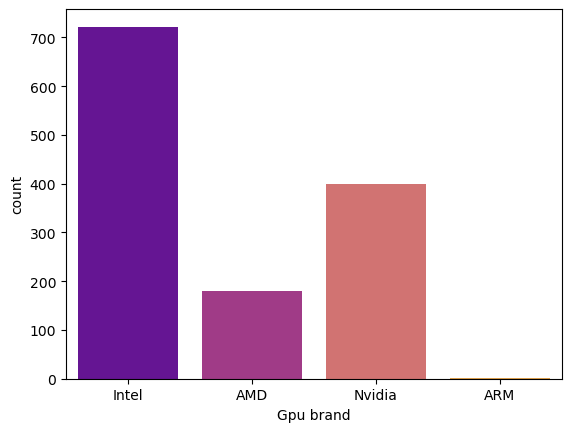

In [86]:
sn.countplot(data = df , x= 'Gpu brand',palette='plasma')

<Axes: xlabel='Gpu brand', ylabel='count'>

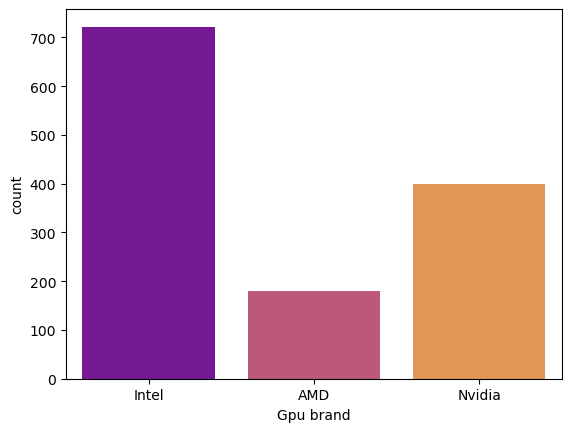

In [88]:
# removing the "ARM" tuple

df = df[df['Gpu brand']!='ARM']
sn.countplot(data = df, x = 'Gpu brand',palette='plasma')

<Axes: xlabel='Gpu brand', ylabel='Price'>

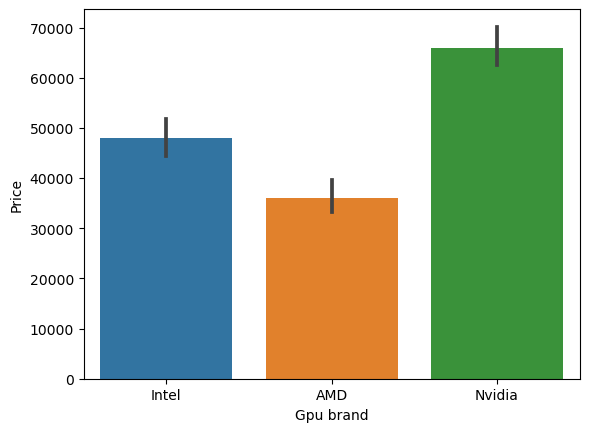

In [90]:
# price-GPU analysis,i used np.median in order to check if there is any
# inpact of outlier or not

sn.barplot(x= df['Gpu brand'],y =df['Price'],estimator=np.median)

In [91]:
df = df.drop(columns=['Gpu'])
df.head()

,Unnamed: 0.1,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,CPU_name1,HDD,SSD,Gpu brand
0,0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,Intel
1,1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,Intel
2,2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,Intel
3,3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7,0,512,AMD
4,4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5,0,256,Intel


In [92]:
df['OpSys'].value_counts()

OpSys
Windows    1125
Other        94
Linux        62
Mac          21
Name: count, dtype: int64

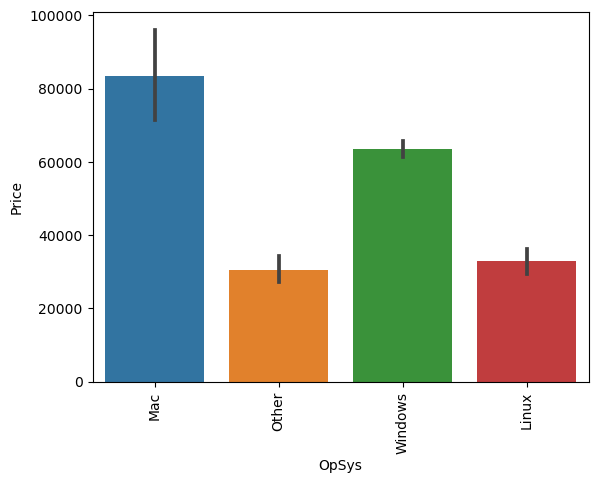

In [94]:
sn.barplot(x= df['OpSys'],y= df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [95]:
df['OpSys'].unique()

array(['Mac', 'Other', 'Windows', 'Linux'], dtype=object)

<Axes: xlabel='Weight', ylabel='Density'>

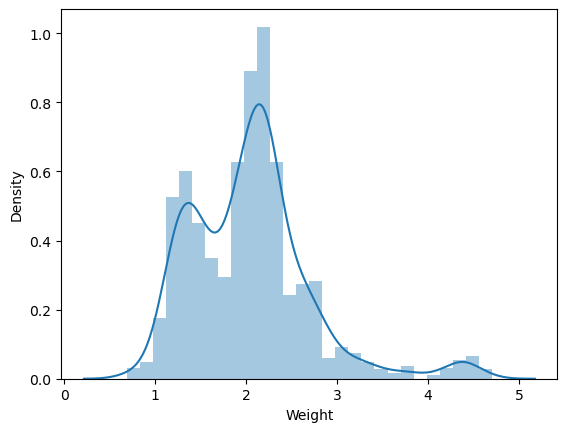

In [97]:
sn.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

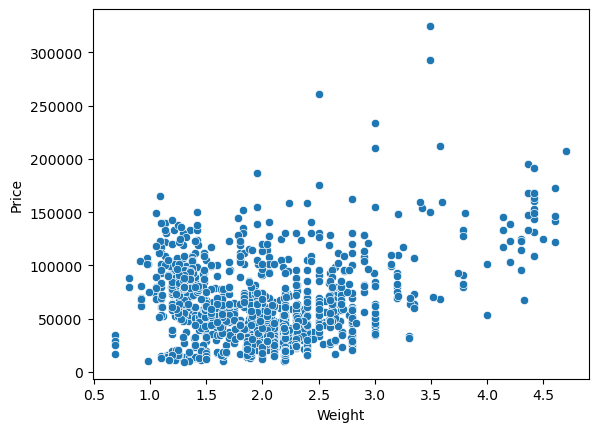

In [99]:
sn.scatterplot(x= df['Weight'],y=df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

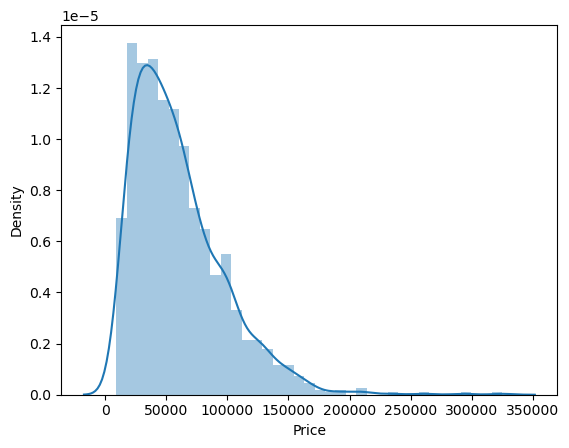

In [100]:
sn.distplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

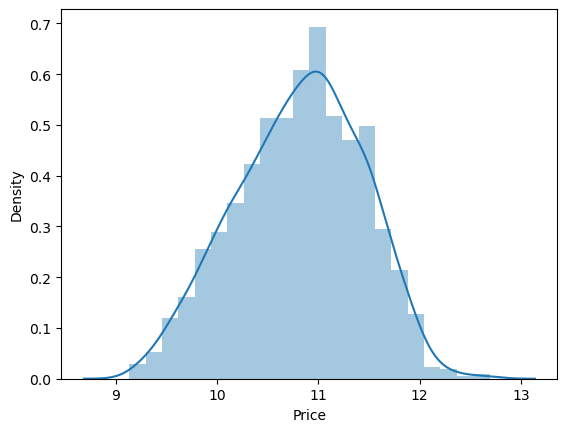

In [102]:
# so if we apply np.log to the Price col we get a gaussian distibution

sn.distplot(np.log(df['Price']))

<Axes: >

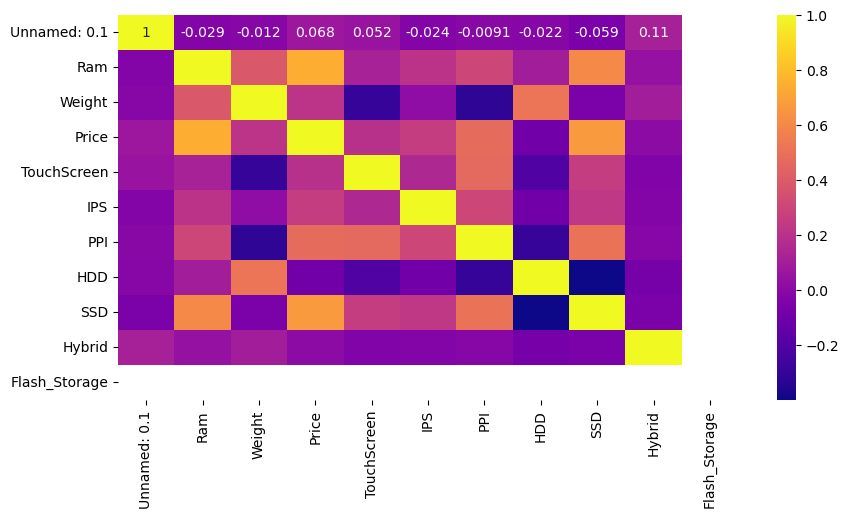

In [103]:
plt.figure(figsize=(10,5))
sn.heatmap(numeric_df.corr(),annot=True,cmap='plasma')

In [108]:
df.drop("CPU_name", inplace=True, axis =1 )

In [116]:
df["CPU_name"] =df["CPU_name1"]

In [118]:
df.drop("CPU_name1", axis=1, inplace=True)

In [119]:
df

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,HDD,SSD,Gpu brand,CPU_name
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,0,128,Intel,Intel Core i5
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,0,0,Intel,Intel Core i5
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,0,256,Intel,Intel Core i5
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,0,512,AMD,Intel Core i7
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,0,256,Intel,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,0,128,Intel,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,0,512,Intel,Intel Core i7
1300,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,0,0,Intel,Intel Processor
1301,HP,Notebook,6,Windows,2.19,40705.9200,0,0,100.454670,1000,0,AMD,Intel Core i7


## Model Building

In [122]:
y = np.log(df['Price'])
x = df.drop(['Price'],axis = 1)

In [123]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [124]:
x

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,HDD,SSD,Gpu brand,CPU_name
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,0,128,Intel,Intel Core i5
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,0,0,Intel,Intel Core i5
2,HP,Notebook,8,Other,1.86,0,0,141.211998,0,256,Intel,Intel Core i5
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,0,512,AMD,Intel Core i7
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,0,256,Intel,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,1,157.350512,0,128,Intel,Intel Core i7
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,1,276.053530,0,512,Intel,Intel Core i7
1300,Lenovo,Notebook,2,Windows,1.50,0,0,111.935204,0,0,Intel,Intel Processor
1301,HP,Notebook,6,Windows,2.19,0,0,100.454670,1000,0,AMD,Intel Core i7


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [126]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 12), (196, 12))

In [127]:
X_train

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,HDD,SSD,Gpu brand,CPU_name
183,Toshiba,Notebook,8,Windows,2.00,0,0,100.454670,0,128,Intel,Intel Core i5
1141,MSI,Gaming,8,Windows,2.40,0,0,141.211998,1000,128,Nvidia,Intel Core i7
1049,Asus,Netbook,4,Other,1.20,0,0,135.094211,0,0,Intel,Intel Processor
1020,Dell,2 in 1 Convertible,4,Windows,2.08,1,1,141.211998,1000,0,Intel,Intel Core i3
878,Dell,Notebook,4,Windows,2.18,0,0,141.211998,1000,128,Nvidia,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Windows,2.20,0,0,100.454670,500,0,Nvidia,Intel Core i3
299,Asus,Ultrabook,16,Windows,1.63,0,0,141.211998,0,512,Nvidia,Intel Core i7
493,Acer,Notebook,8,Windows,2.20,0,0,100.454670,1000,0,AMD,AMD Processor
527,Lenovo,Notebook,8,Other,2.20,0,0,100.454670,2000,0,Nvidia,Intel Core i3


In [128]:
X_train.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'TouchScreen', 'IPS',
       'PPI', 'HDD', 'SSD', 'Gpu brand', 'CPU_name'],
      dtype='object')

In [129]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'HDD',
 9: 'SSD',
 10: 'Gpu brand',
 11: 'CPU_name'}

### Linear Regression¶

In [130]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,10,11]
# the remainder we keep as passthrough i.e no other col must get effected 
# except the ones undergoing the transformation!

In [131]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,10,11])],remainder='passthrough')


In [132]:
step1

,transformers,"[('col_tnf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,False


In [133]:
step2 = LinearRegression()

In [134]:
pipe = Pipeline([("step1", step1),("step2",step2)])

In [135]:
pipe

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('col_tnf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [136]:
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

In [138]:
pipe.score(X_test,y_test)

0.8067729390471947

In [139]:
print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8067729390471947
MAE 0.21011396168486507


In [140]:
## now mae is 0.21 so if you want to check how much difference is there do this

## we see there is a difference of 1.23 only as per the orignal value
## that is our model predicts +-0.21 more/less than the original price!

np.exp(0.21)

1.2336780599567432

### Ridge Regression

In [141]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8125068009661907
MAE 0.20943908363549388


### LassoRegression

In [143]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8070966396251544
MAE 0.21156499065717102


### Decision Tree

In [144]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.848753160269181
MAE 0.17937988478057443


### Random Forest

In [146]:
step1 = ColumnTransformer(transformers=[
            ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8867811725279074
MAE 0.15867506057438005


In [147]:
import joblib

In [148]:
joblib.dump(pipe, "rfm.pkl")

['rfm.pkl']

In [149]:
joblib.dump(df,"df.pkl")

['df.pkl']